# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     828.7
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           5.00e-40
Time:                        09:42:31   Log-Likelihood:               -0.50140
No. Observations:                  50   AIC:                             9.003
Df Residuals:                      46   BIC:                             16.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0917      0.087     58.625      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.57872503  5.0423843   5.46946977  5.8351302   6.12348302  6.33022382
  6.46333354  6.54176721  6.59233968  6.64532008  6.72945861  6.86726301
  7.0713006   7.34213349  7.66822622  8.02784102  8.39260928  8.73219239
  9.01926632  9.23401086  9.36736605  9.42252068  9.4143884   9.36715743
  9.31031653  9.27381005  9.28311819  9.35507064  9.49508154  9.69625994
  9.94054196 10.20165864 10.44945186 10.65482921 10.79454383 10.85501377
 10.83455348 10.74365074 10.60324353 10.44128004 10.28812676 10.17157945
 10.11229631 10.12040394 10.19383353 10.31866079 10.47139365 10.62283196
 10.74286497 10.80541847]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.77860772 10.63024824 10.37822235 10.06328164  9.73906954  9.45898753
  9.26312058  9.16842302  9.16456744  9.21647326]


## Plot comparison

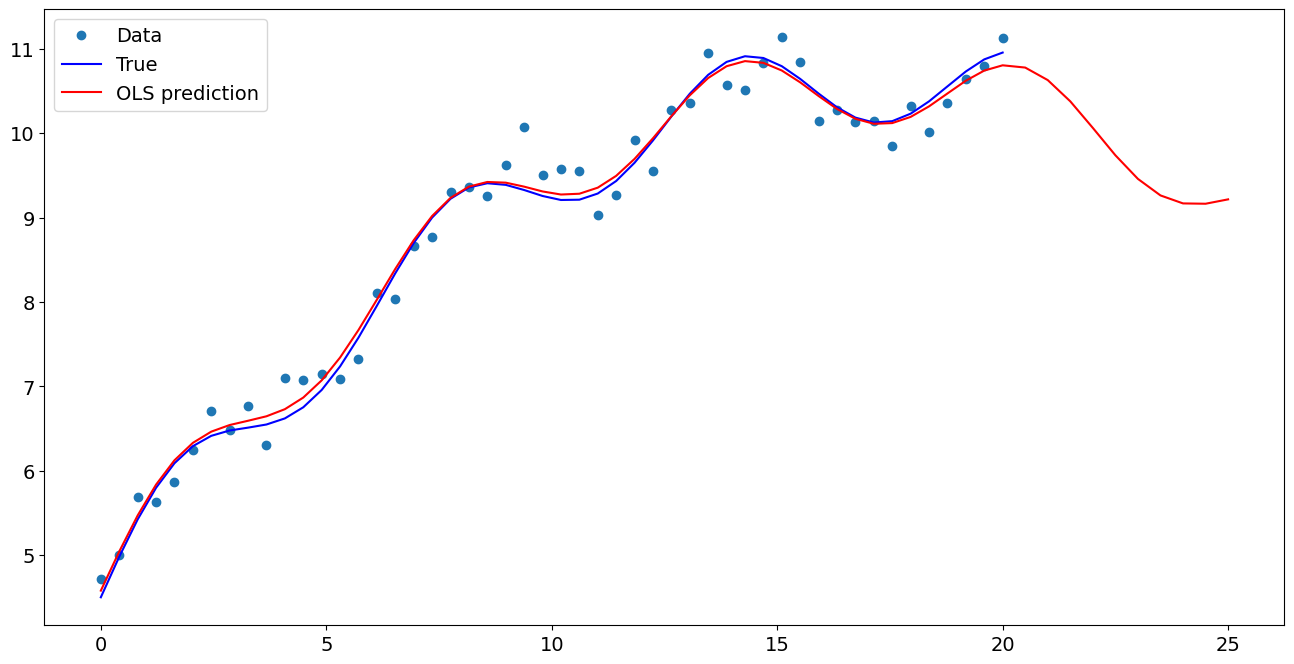

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.091704
x1                  0.495711
np.sin(x1)          0.455993
I((x1 - 5) ** 2)   -0.020519
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.778608
1    10.630248
2    10.378222
3    10.063282
4     9.739070
5     9.458988
6     9.263121
7     9.168423
8     9.164567
9     9.216473
dtype: float64